## ANN

In [3]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import os
import cv2
import matplotlib
from tqdm import tqdm

In [2]:
DATA_DIR = r'F:\Study Materials\AIUB\11th Semester\COMPUTER VISION AND PATTERN RECOGNITION B\Datasets\facemaskarchive3'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['mask_weared_incorrect', 'without_mask', 'with_mask']


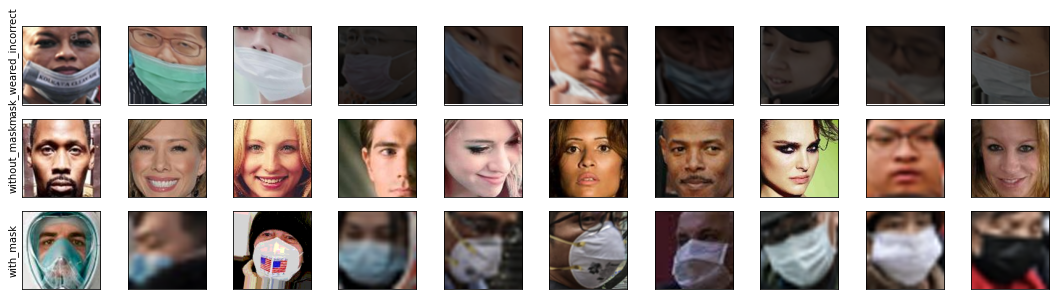

In [3]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(3,10,i+1)
        #Conver BGR to RGB
        #img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [4]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
        
print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 2794/2794 [00:07<00:00, 387.05it/s]

8382


In [5]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 104/104 [00:02<00:00, 39.64it/s]

169


In [6]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(valid_data))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 439.52it/s]

600


In [7]:
import random
random.shuffle(training_data)
random.shuffle(test_data)

In [31]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (8382, 227, 227, 3) Y_train= (8382,)


In [32]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (169, 227, 227, 3) Y_test= (169,)


In [33]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (600, 227, 227, 3) Y_valid= (600,)


In [11]:
# import pickle

# #train
# pickle_out = open("Final_project/X_train,pickle","wb")
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open("Final_project/Y_train,pickle","wb")
# pickle.dump(Y_train, pickle_out)
# pickle_out.close()

# #valid
# pickle_out = open("Final_project/X_valid,pickle","wb")
# pickle.dump(X_valid, pickle_out)
# pickle_out.close()

# pickle_out = open("Final_project/Y_valid,pickle","wb")
# pickle.dump(Y_valid, pickle_out)
# pickle_out.close()

# #test
# pickle_out = open("Final_project/X_test,pickle","wb")
# pickle.dump(X_test, pickle_out)
# pickle_out.close()

# pickle_out = open("Final_project/Y_test,pickle","wb")
# pickle.dump(Y_test, pickle_out)
# pickle_out.close()

In [12]:
# reshape  2 d to 1 d 
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

# normalization
X_train=X_train/255
X_test=X_test/255

print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {Y_train.shape}")

Shape of x_train: (8382, 227, 227, 3)
Shape of y_train: (8382,)


In [13]:
#defining the model...
model = keras.Sequential([
        layers.Flatten(input_shape=(227,227,3)),
        layers.Dense(300, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(3, activation='softmax')    
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 154587)            0         
                                                                 
 dense (Dense)               (None, 300)               46376400  
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 46,457,003
Trainable params: 46,457,003
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compiling the model...
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
#training data to the model...
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
210/210 [==============================] - 40s 185ms/step - loss: 4.9999 - accuracy: 0.6209 - val_loss: 0.6150 - val_accuracy: 0.8116
Epoch 2/10
210/210 [==============================] - 38s 179ms/step - loss: 0.6063 - accuracy: 0.7984 - val_loss: 0.4064 - val_accuracy: 0.8682
Epoch 3/10
210/210 [==============================] - 37s 175ms/step - loss: 0.5016 - accuracy: 0.8261 - val_loss: 0.3968 - val_accuracy: 0.8623
Epoch 4/10
210/210 [==============================] - 37s 177ms/step - loss: 0.4486 - accuracy: 0.8464 - val_loss: 0.6342 - val_accuracy: 0.7788
Epoch 5/10
210/210 [==============================] - 38s 180ms/step - loss: 0.6072 - accuracy: 0.7996 - val_loss: 0.3823 - val_accuracy: 0.8724
Epoch 6/10
210/210 [==============================] - 38s 182ms/step - loss: 0.3659 - accuracy: 0.8682 - val_loss: 0.3534 - val_accuracy: 0.8706
Epoch 7/10
210/210 [==============================] - 38s 183ms/step - loss: 0.3326 - accuracy: 0.8862 - val_loss: 0.2997 - val_ac

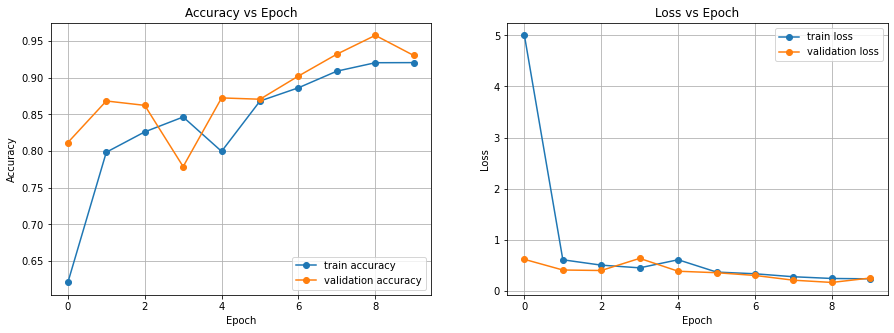

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [17]:
    #evaluating the model for testing data..
test_loss,test_acc=model.evaluate(X_test,Y_test)
print('---------------------------')
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)
print('---------------------------')

6/6 [==============================] - 0s 26ms/step - loss: 1.9853 - accuracy: 0.4675
---------------------------
Test Accuracy: 0.4674556255340576
Test Loss: 1.985302209854126
---------------------------


In [20]:
#predicting the data...
predictions=model.predict(X_test[:3])
print(np.argmax(predictions, axis=1))

[1 1 0]


In [21]:
#predicting the data...
predictions=model.predict(X_test[:3])
print(np.argmax(predictions, axis=1))

[1 1 0]


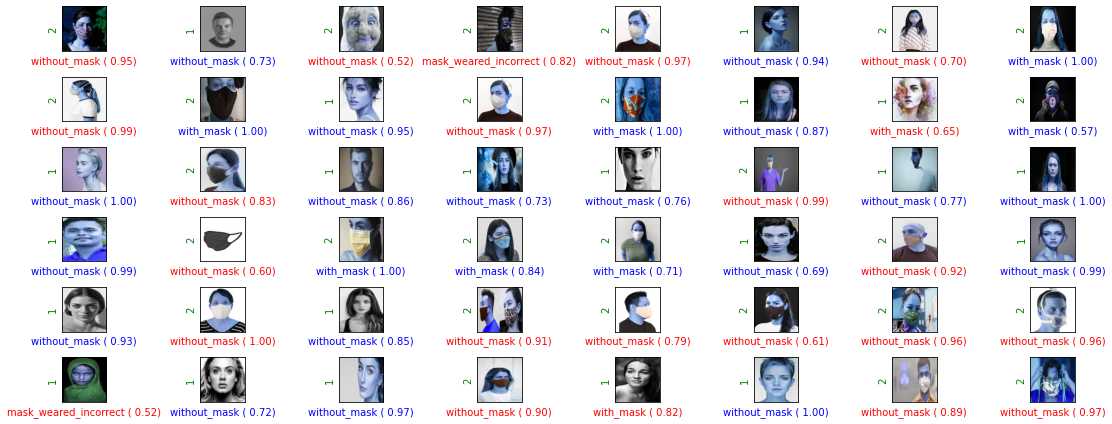

In [28]:
ROWS = 6
COLS = 8

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(16,6))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(227,227,3), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{CATEGORIES[prediction]} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{CATEGORIES[prediction]} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

## Alexnet

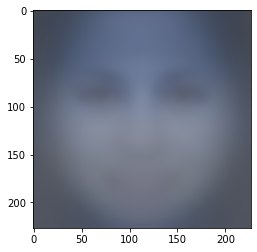

In [34]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [35]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

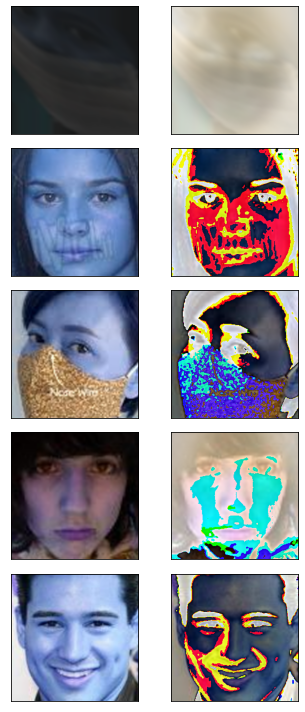

In [36]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [41]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(3),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation_8 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_9 (Activation)   (None, 17, 17, 256)      

In [42]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [44]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=10, validation_data=(X_valid_norm, Y_valid), batch_size=32)

Epoch 1/10
262/262 [==============================] - 210s 801ms/step - loss: 0.5349 - accuracy: 0.8434 - val_loss: 0.4313 - val_accuracy: 0.9033
Epoch 2/10
262/262 [==============================] - 205s 781ms/step - loss: 0.3110 - accuracy: 0.9042 - val_loss: 0.1644 - val_accuracy: 0.9450
Epoch 3/10
262/262 [==============================] - 210s 802ms/step - loss: 0.2354 - accuracy: 0.9279 - val_loss: 0.1077 - val_accuracy: 0.9667
Epoch 4/10
262/262 [==============================] - 201s 766ms/step - loss: 0.1860 - accuracy: 0.9408 - val_loss: 0.1096 - val_accuracy: 0.9600
Epoch 5/10
262/262 [==============================] - 205s 782ms/step - loss: 0.1621 - accuracy: 0.9522 - val_loss: 0.1353 - val_accuracy: 0.9717
Epoch 6/10
262/262 [==============================] - 208s 796ms/step - loss: 0.1478 - accuracy: 0.9582 - val_loss: 0.0506 - val_accuracy: 0.9800
Epoch 7/10
262/262 [==============================] - 203s 776ms/step - loss: 0.1450 - accuracy: 0.9571 - val_loss: 0.1354 -

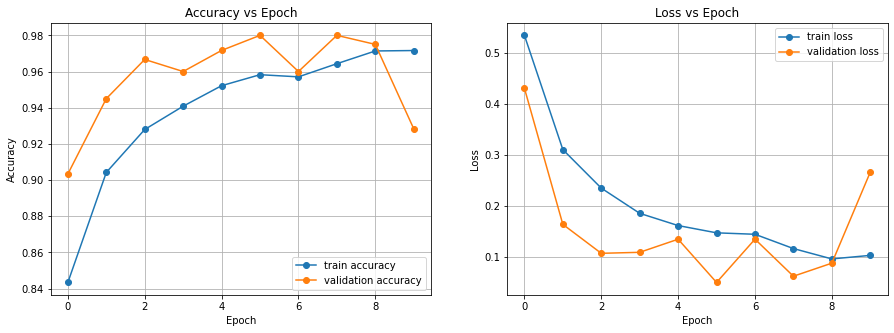

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [46]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(X_test,Y_test)
print('---------------------------')
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)
print('---------------------------')

6/6 [==============================] - 1s 133ms/step - loss: 6.1353 - accuracy: 0.6450
---------------------------
Test Accuracy: 0.6449704170227051
Test Loss: 6.13527250289917
---------------------------


# VGGNet

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
IMAGE_SIZE = [224, 224]

DATA_DIR = r'F:\Study Materials\AIUB\11th Semester\COMPUTER VISION AND PATTERN RECOGNITION B\Datasets\facemaskarchive3'
train_path  = os.path.join(DATA_DIR, 'train')
valid_path  = os.path.join(DATA_DIR, 'test')

In [5]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [10]:
folders = glob(r'F:\Study Materials\AIUB\11th Semester\COMPUTER VISION AND PATTERN RECOGNITION B\Datasets\facemaskarchive3\train\*')

In [11]:
folders

['F:\\Study Materials\\AIUB\\11th Semester\\COMPUTER VISION AND PATTERN RECOGNITION B\\Datasets\\facemaskarchive3\\train\\mask_weared_incorrect',
 'F:\\Study Materials\\AIUB\\11th Semester\\COMPUTER VISION AND PATTERN RECOGNITION B\\Datasets\\facemaskarchive3\\train\\without_mask',
 'F:\\Study Materials\\AIUB\\11th Semester\\COMPUTER VISION AND PATTERN RECOGNITION B\\Datasets\\facemaskarchive3\\train\\with_mask']

In [12]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [13]:
len(folders)

3

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'F:\Study Materials\AIUB\11th Semester\COMPUTER VISION AND PATTERN RECOGNITION B\Datasets\facemaskarchive3\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8382 images belonging to 3 classes.


In [23]:
# Make sure you provide the same target size as initialied for the image size
test_set = train_datagen.flow_from_directory(r'F:\Study Materials\AIUB\11th Semester\COMPUTER VISION AND PATTERN RECOGNITION B\Datasets\facemaskarchive3\test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 169 images belonging to 3 classes.


In [24]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\shart\AppData\Local\Temp\ipykernel_23688\2724883676.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
262/262 [==============================] - 576s 2s/step - loss: 0.2661 - accuracy: 0.9049 - val_loss: 0.5054 - val_accuracy: 0.8402
Epoch 2/10
262/262 [==============================] - 596s 2s/step - loss: 0.1109 - accuracy: 0.9622 - val_loss: 0.3848 - val_accuracy: 0.8639
Epoch 3/10
262/262 [==============================] - 600s 2s/step - loss: 0.0853 - accuracy: 0.9716 - val_loss: 0.3612 - val_accuracy: 0.8876
Epoch 4/10
262/262 [==============================] - 611s 2s/step - loss: 0.0816 - accuracy: 0.9729 - val_loss: 0.3897 - val_accuracy: 0.9053
Epoch 5/10
262/262 [==============================] - 604s 2s/step - loss: 0.0659 - accuracy: 0.9784 - val_loss: 0.9330 - val_accuracy: 0.7988
Epoch 6/10
262/262 [==============================] - 600s 2s/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.4865 - val_accuracy: 0.8757
Epoch 7/10
262/262 [==============================] - 628s 2s/step - loss: 0.0526 - accuracy: 0.9816 - val_loss: 1.6424 - val_accuracy: 0.7515

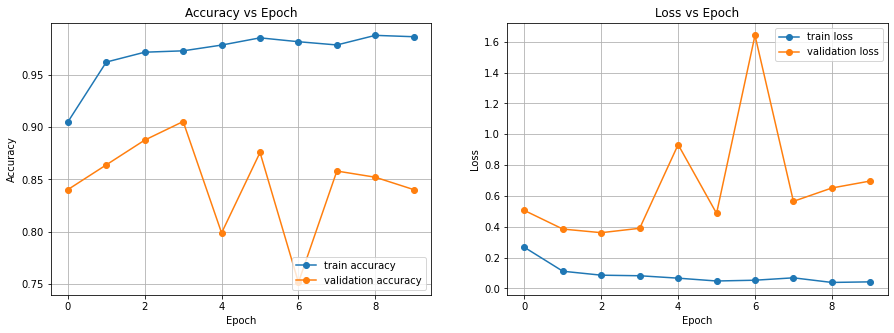

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], 'o-', label='train accuracy')
plt.plot(r.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(r.history['loss'], 'o-', label='train loss')
plt.plot(r.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [28]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')